In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme = "monokai",context = "notebook", ticks = True,grid = False)

In [2]:
#Declaring the environment for our game
class snake_ladder(object):
    def __init__(self):
        #state space
        self.states = list(range(9))
        #Transition probability matrix
        self.tr_matrix = [[4/6,1/6,1/6,0,0,0,0,0,0],[0,4/6,1/6,1/6,0,0,0,0,0],[0,0,0,0,1,0,0,0,0]
                         ,[0,0,0,4/6,1/6,1/6,0,0,0],[0,0,1,0,0,0,0,0,0],[0,0,0,0,0,4/6,1/6,1/6,0]
                         ,[0,0,0,0,0,0,4/6,1/6,1/6],[0,0,0,0,0,0,0,5/6,1/6],[0,0,0,0,0,0,0,0,1]]
    
    #Helper function to check if current state is 2 or 4
    def not_absorb(self,state):
        if(state == 4 or state == 2):
            return True
        return False
    
    #Helper function which tells which state to transition next from the current state
    def next_state(self,curr_state):
        #For each row of transition probability matrix it is a multinomial distribution
        #so we just sample from the distribution using probabilities from the matrix
        return(np.random.choice(self.states,p = self.tr_matrix[curr_state]))
        
    #Helper function to check if current state is the end state i.e 8.
    def end(self,curr_state):
        if(curr_state == 8):
            return True
        return False

In [3]:
#Declaring class object
game = snake_ladder()

#number of iterations
num_iters = 20000

#cnt end is bernoulli random variable
cnt_end = 0

#to store average of each step
result = []

for i in range(num_iters):
    done = False
    curr_state = 0
    #continue till we dont reach end state
    while(not done):
        curr_state = game.next_state(curr_state)
        check = game.not_absorb(curr_state)
        #if current state 4 or 2 then break as we will be stuck in them
        if(check):
            break
        #if we reach end then done becomes true
        if(game.end(curr_state)):
            done = True
    #if we have reached end then output of random variable is 1.
    if(done):
        #add 1 if we reach end
        cnt_end = cnt_end + 1
    #append mean for the particular iteration in result list.
    result.append(cnt_end/(i+1))

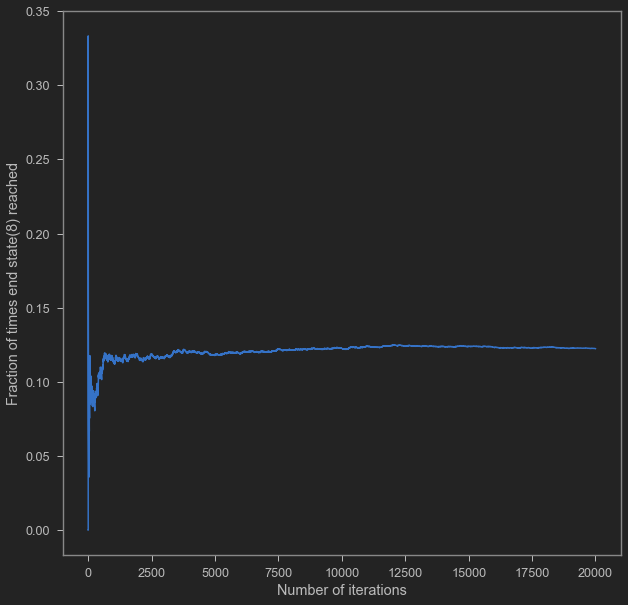

In [4]:
#Plot simulation result
plt.figure(figsize=(10,10))
plt.plot(result)
plt.savefig('result.png')
plt.xlabel('Number of iterations');
plt.ylabel('Fraction of times end state(8) reached');